In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Loading Data

In [4]:
#importing dataset into the notebook
df = pd.read_csv('AB_NYC_2019.csv',
 encoding_errors = 'ignore', # skips/ignores characters that can’t be decoded (like emojis or corrupt symbols).
 on_bad_lines = 'skip') # skips rows that are badly formatted (e.g., wrong number of columns)

## Step 2: Initial Exploration

In [5]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
df.shape

(48895, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Step 3: Data Cleaning 

In [ ]:
#identifying the total amount of null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#replacing the null value of 'last_review' and 'review_per_month' with 0
df['last_review'].fillna(0, inplace = True)
df['reviews_per_month'].fillna(0, inplace = True)

/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_25937/548492690.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace = True)


In [19]:
#checking the null records
null_records = df[(df['host_name'].isnull()) | (df['name'].isnull())]
print(null_records)

             id                                               name    host_id  \
360      100184                                          Bienvenue     526653   
2700    1449546                            Cozy Studio in Flatbush    7779204   
2854    1615764                                                NaN    6676776   
3703    2232600                                                NaN   11395220   
5745    4183989    SPRING in the City!! Zen-Style Tranquil Bedroom     919218   
5775    4209595                                                NaN   20700823   
5975    4370230                                                NaN   22686810   
6075    4446862                 Charming Room in Prospect Heights!   23077718   
6269    4581788                                                NaN   21600904   
6567    4756856                                                NaN    1832442   
6582    4763327                Luxurious, best location, spa inc'l   24576978   
6605    4774658             

In [20]:
#replacing null values of 'name' and 'host_name'
df['name'].fillna('No Name', inplace = True)
df['host_name'].fillna('Unknown', inplace = True)

/var/folders/nt/4rp641zs5lg7_234f6d1h4_00000gn/T/ipykernel_25937/2315787903.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_name'].fillna('Unknown', inplace = True)


In [21]:
df.isna().sum()
#the null value have been treated

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
#identifying the total amount of duplicate values
df.duplicated().sum()

np.int64(0)

In [25]:
#changing the datatype of the 'last_review' column
df['last_review'] = pd.to_datetime(df['last_review'], errors = 'coerce') #errors='coerce' → any invalid/missing dates will become NaT (Not a Time).

In [27]:
print(df['last_review'].dtype) 
print(df['last_review'].head())

datetime64[ns]
0   2018-10-19
1   2019-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]


In [ ]:
#checking for any inconsistent capitalization in 'neighbourhood_group'
df['neighbourhood_group'].unique()
#no inconsistent capitalization

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [37]:
#checking for any inconsistent capitalization in 'neighbourhood'
df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [ ]:
df['neighbourhood'].str.lower().nunique()
#no inconsistent capitalization

221

In [40]:
df.to_csv('AB_NYC_2019_cleaned', index = False) #index=False → avoids writing the DataFrame index as an extra column in the CSV.

## Step 4. Exploratory Data Analysis

In [41]:
df.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895,4.889500e+04,48895,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,48895.000000,48895.000000,48895.000000
unique,NaN,47906,NaN,11453,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,2018-10-04 01:47:23.910099456,1.090910,7.143982,112.781327
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.040000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.370000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,2019-06-23 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,NaN,2.743213e+08,NaN,NaN,NaN,40.913060,-73.712990,NaN,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000


Text(0.5, 1.0, 'Distribution of Prices')

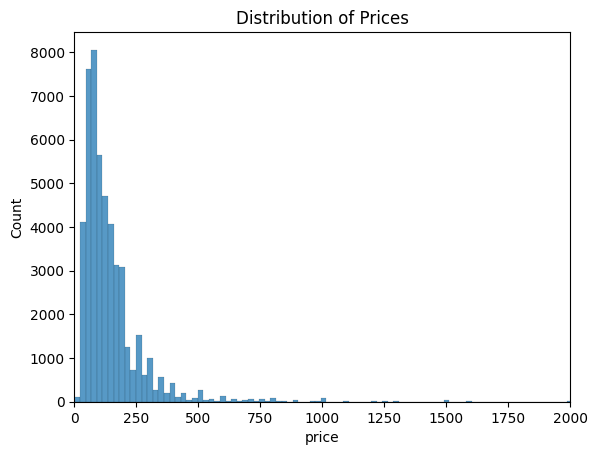

In [113]:
#Distribution of Prices 
sns.histplot(df['price'])
plt.xlim(0, 2000)
plt.title('Distribution of Prices')

Using the describe table we observe that:
1. the average price comes out to be $152.72.
2. the maximum price of an ABnB is $10,000, while
3. the minimum price is $0.

The subsequent graph of the price column informs us that most of the ABnB are priced less that $500 hence the right-skewed graph.

Text(0.5, 1.0, 'Distribution of the Number of Reviews')

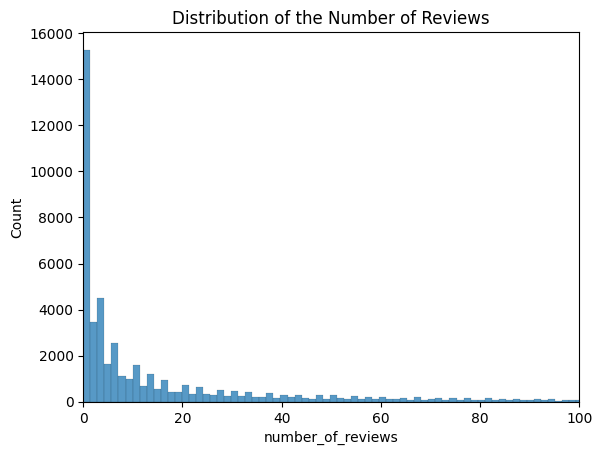

In [112]:
#Distribution of the Number of Reviews
sns.histplot(df['number_of_reviews'])
plt.xlim(0, 100)
plt.title('Distribution of the Number of Reviews')

Using the describe table we observe that the average reviews per month come out to be 23.
Moreover, the graph indicates that majority of the listings have less than 20 reviews, with a few outliers having hundreds of reviews.

Text(0.5, 1.0, 'Distribution of Reviews per Month')

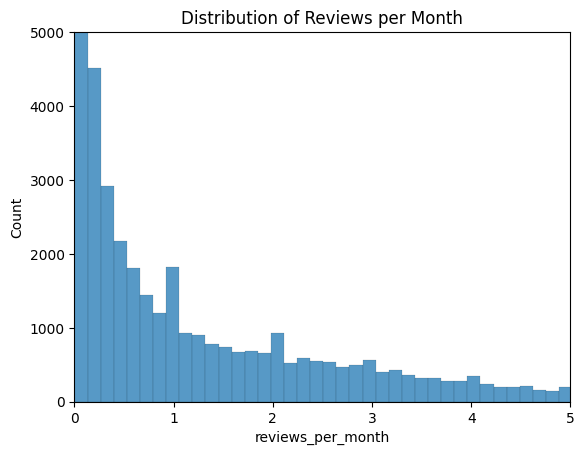

In [111]:
#Distribution of Reviews per Month
sns.histplot(df['reviews_per_month'])
plt.xlim(0, 5)
plt.ylim(0, 5000)
plt.title('Distribution of Reviews per Month')

Using the describe table we observe that the average reviews per month are only 1 in number. Moreover, the graph indicates that most of these listings don't get even a single review on a per month basis.

Text(0.5, 1.0, 'Distribution of Availibility')

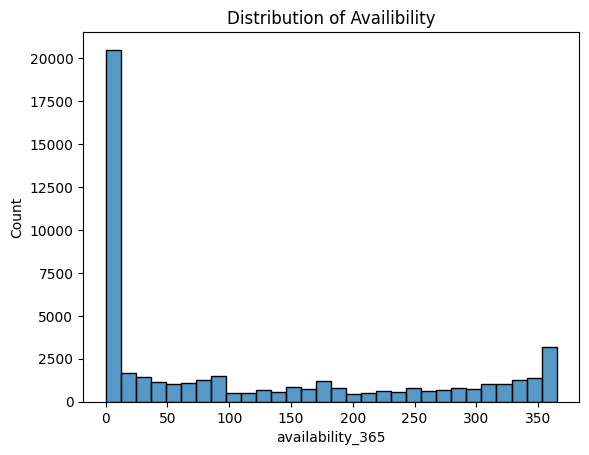

In [110]:
#Distribution of Availibility
sns.histplot(df['availability_365'])
plt.title('Distribution of Availibility')

Using the describe table we observe that the listings have an average availibility of 112 days, with 365 days being the maximum and 0 days being the minimum. The graph shows some peaks around 30 days, 90 days and 180 days, but most of these listings aren't available for even a single day.

Text(0, 0.5, 'Number of Listings')

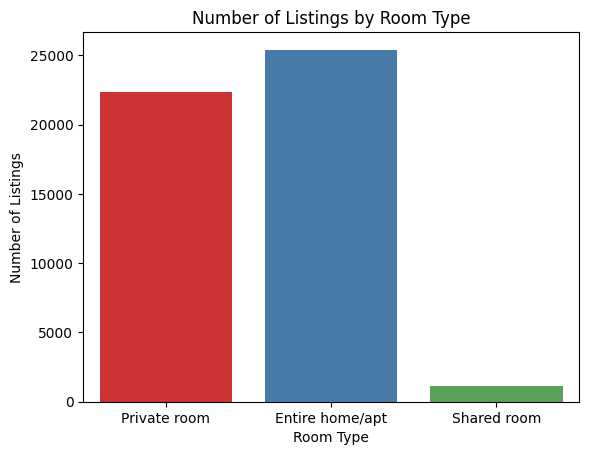

In [ ]:
#listings by room type
sns.countplot(df, x = 'room_type', hue = 'room_type', palette = 'Set1' )
plt.title('Number of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')

Using the graph, we can interpret that most of the listing are of an Entire home/apt room type, followed by a Private room. Shared rooms are very rare.

Text(0, 0.5, 'Number of Listings')

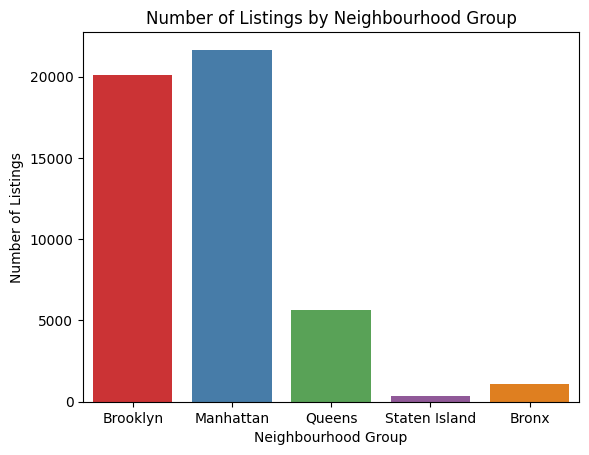

In [ ]:
#listings by neighbourhood group
sns.countplot(df, x = 'neighbourhood_group', hue = 'neighbourhood_group', palette = 'Set1')
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')

Using the graph, we interpret that Manhattan has the largest amount of listings, while Staten Island has the rarest of listings.

Text(0.5, 1.0, 'Geographical Distribution of Airbnb Listings in NYC')

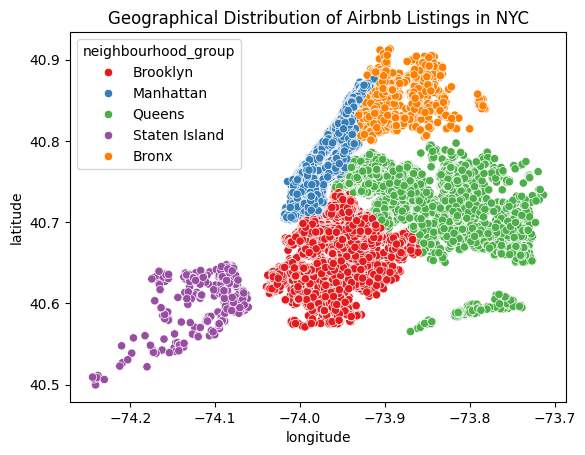

In [92]:
#distribution of listings by latitude and longitude
sns.scatterplot(df, x = 'longitude', y = 'latitude', hue='neighbourhood_group', palette = 'Set1')
plt.title('Geographical Distribution of Airbnb Listings in NYC')

Text(0, 0.5, 'Number of Listings')

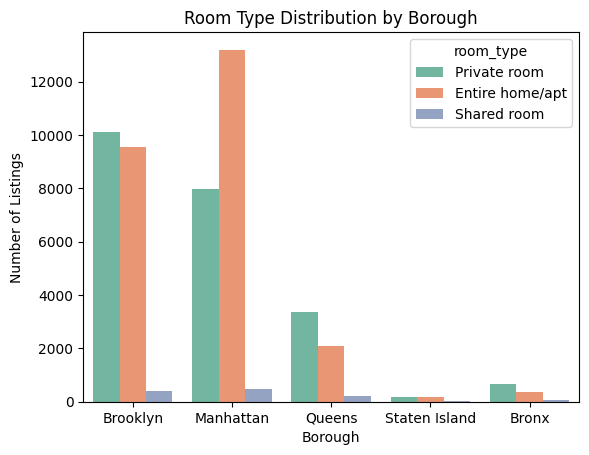

In [98]:
#distribution of room type by neighbourhood group
sns.countplot(df, x = 'neighbourhood_group', hue = 'room_type', palette = 'Set2')
plt.title('Room Type Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')


As indiated by the graph, we can clearly deduce that Brooklyn has the highest number of Private rooms, while Manhattan has the largest amount of Entire home/apt as well as Shared rooms.

(0.0, 1000.0)

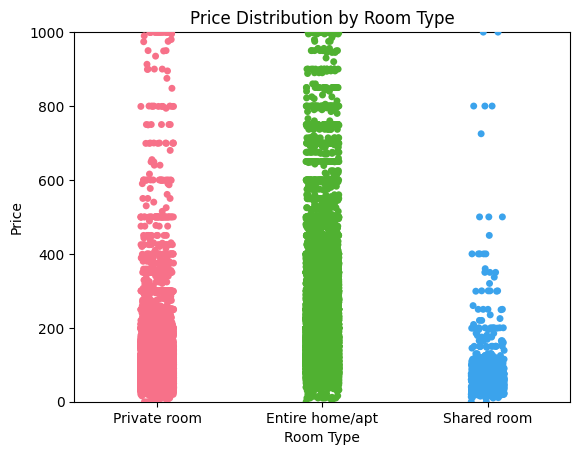

In [105]:
#price distribution by room type
sns.stripplot(df, x = 'room_type', y = 'price', hue = 'room_type', palette = 'husl')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, 1000)


Using the graph, we deduce that Entire home/apt room types tend to have higher prices with many clustered in the moderate price range and a few extreme outliers. Private rooms have moderate prices, generally lower than entire homes/apts. Shared rooms are the cheapest, with prices concentrated at the lower end.

## Step 5: Connecting to PostgreSQL

In [94]:
#importing psycopg2
import psycopg2

In [95]:
#connecting to PostgreSQL
conn = psycopg2.connect(
    host = 'localhost',
    database = 'sql_project_p6',
    user = 'postgres',
    password = 'password'
)

cur = conn.cursor()

In [96]:
#creating the table for listings
cur.execute("""
CREATE TABLE listings (
    id BIGINT PRIMARY KEY,
    name TEXT,
    host_id BIGINT,
    host_name TEXT,
    neighbourhood_group TEXT,
    neighbourhood TEXT,
    latitude DOUBLE PRECISION,
    longitude DOUBLE PRECISION,
    room_type TEXT,
    price NUMERIC,
    minimum_nights INT,
    number_of_reviews INT,
    last_review DATE,
    reviews_per_month NUMERIC,
    calculated_host_listings_count INT,
    availability_365 INT
);
""")

conn.commit() 

## Step 7: Visualising SQL Queries

Text(0, 0.5, 'Host Name')

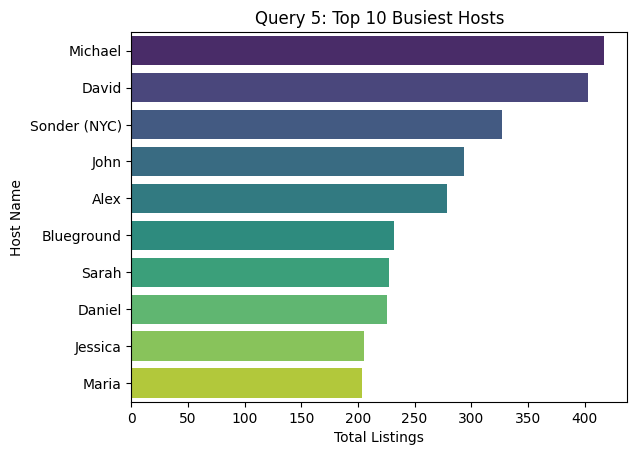

In [129]:
df_q5 = pd.read_csv("query_5.csv")  

sns.barplot( df_q5, x = 'total_listings', y = 'host_name', hue = 'host_name', palette='viridis')
plt.title('Query 5: Top 10 Busiest Hosts')
plt.xlabel('Total Listings')
plt.ylabel('Host Name')
#horizontal bar plot for better readability

Text(0, 0.5, 'Neighbourhood')

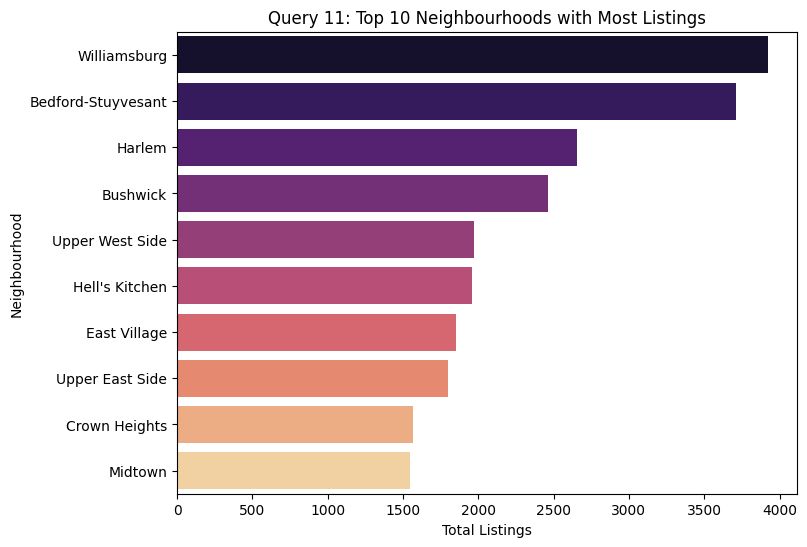

In [130]:
df_q11 = pd.read_csv("query_11.csv")  # Columns: neighbourhood, total_listings

plt.figure(figsize=(8,6))
sns.barplot(df_q11, x = 'total_listings', y = 'neighbourhood', hue = 'neighbourhood', palette='magma')
plt.title('Query 11: Top 10 Neighbourhoods with Most Listings')
plt.xlabel('Total Listings')
plt.ylabel('Neighbourhood')
#horizontal bar plot for better readability